# Regression Multiple

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Dataset

On commence par initialiser le dataset que l'on notera $M$, que l'on cooupe dans deux variables : ${ x }$ et ${ y }$ sont des matrices.

- $ {M} $ le dataset initial, contient les 2 colonnes de caractéristiques, ainsi que la colonne target (cible) à la fin, soit une matrice de taille $(100 \times 3)$

$$
M = \left[
\begin{array}{ccc}
x_1^{(1)} & x_2^{(1)} & y^{(1)} \\
x_1^{(2)} & x_2^{(2)} & y^{(2)} \\
\vdots & \vdots & \vdots \\
x_1^{(100)} & x_2^{(100)} & y^{(100)}
\end{array}
\right]
$$

- $ {x} $ contient 100 échantillons avec 2 caractéristiques (ou dimensions), soit une matrice de taille $(100 \times 2 )$ :

$$
x = \left[
\begin{array}{cc}
x_1^{(1)} & x_2^{(1)} \\
x_1^{(2)} & x_2^{(2)} \\
\vdots & \vdots \\
x_1^{(100)} & x_2^{(100)}
\end{array}
\right]
$$

- $ {y} $, la cible, est un vecteur de taille $( 100 \times 1 )$ correspondant aux valeurs cibles pour chaque échantillon.

$$
x = \left[
\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(100)}
\end{array}
\right]
$$

On crée ensuite le vecteur ${X}$ pour le modèle quadratique :

- ${ X }$ contient 100 échantillons pour $( (2 \times 2 + 1) )$, soit une matrice de taille $( 100 \times 5 )$, où chaque ligne contient les termes : ${ x_1^{(l)^2} }$, ${ x_1^{(l)} }$, ${ x_2^{(l)^2} }$, ${ x_2^{(l)} }$ et un biais ${ 1 }$ (pour le dernier terme de ${\theta}$ (contenant les coefficients de chaque terme) qui servira, donc, de constante au modèle).

La matrice ${ X }$ peut être représentée comme suit :


$$
X = \left[ 
\begin{array}{ccccc}
x_1^{(1)^2} & x_1^{(1)} & x_2^{(0)^2} & x_2^{(0)} & 1 \\
x_1^{(2)^2} & x_1^{(2)} & x_2^{(1)^2} & x_2^{(1)} & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
x_1^{(100)^2} & x_1^{(100)} & x_2^{(100)^2} & x_2^{(100)} & 1
\end{array}
\right]
$$

En bref, la matrice ${ X }$ est la matrice ${ x }$ à laquelle on ajoute des termes au carré, ainsi qu'une colonne de 1.

Pour finir, on initialise le vecteur $\theta$ qui contient, lui, tous les coefficients de tous les termes de la matrice X (utile quand on travaillera sur le modèle):

- ${\theta}$ est un vecteur de taille $(5 \times 1)$, chaque terme est un coefficient, le premier est le coefficient de $x_1^{(1)^2}$, le deuxième celui de $x_1^{(1)}$ et ainsi de suite... Le dernier quand à lui est une constante, ce terme est multiplié par le biais $1$.

$$
X = \left[ 
\begin{array}{c}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_{5}
\end{array}
\right]
$$

In [2]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
y = y.reshape(y.shape[0], 1)

X = np.hstack((x**2, x, np.ones((y.shape[0], 1))))

theta = np.random.randn(X.shape[1], 1)

In [3]:
print(x.shape)
print(y.shape)
print(X.shape)
print(theta.shape)

(100, 2)
(100, 1)
(100, 5)
(5, 1)


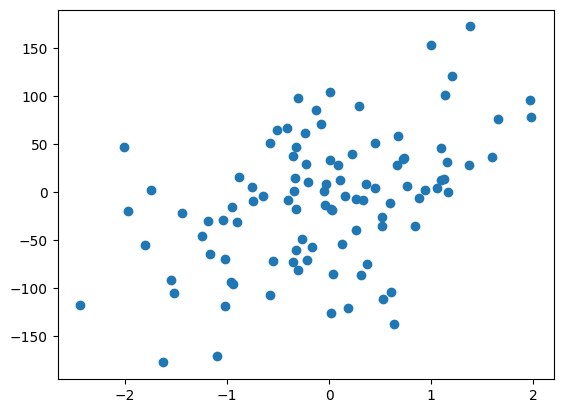

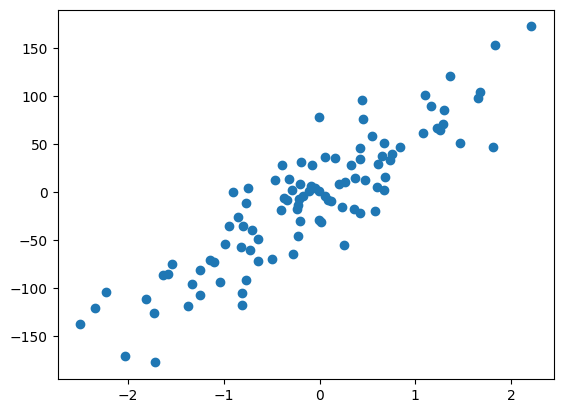

In [4]:
plt.scatter(x[:, 0], y)
plt.show()

plt.scatter(x[:, 1], y)
plt.show()

## 2. Model

Le modèle choisi, est un modèle quadratique de la forme :
    
$$
f(x_1^{(i)}, x_2^{(i)})=\theta_1x_1^{(i)^2}+\theta_2x_1^{(i)}+\theta_3x_2^{(i)2}+\theta_4x_2^{(i)}+\theta_5 \\
$$

Cela peut être écrit de cette manière, avec des matrices :

$$
F = X \cdot \theta
$$

En effet, le produit matriciel suffit pour multiplier le premier terme (ligne 1 colonne 1) de $X$ avec le premier terme de $\theta$ (ligne 1 colonne 1), et ainsi de suite avec ligne 1 colonne 2 pour $X$, ligne 2 colonne 1 pour $\theta$...

$$
F = \left[ 
\begin{array}{c}
f(x_1^{(1)}, x_2^{(1)}) \\
f(x_1^{(2)}, x_2^{(2)}) \\
\vdots \\
f(x_1^{(100)}, x_2^{(100)})
\end{array}
\right]
$$

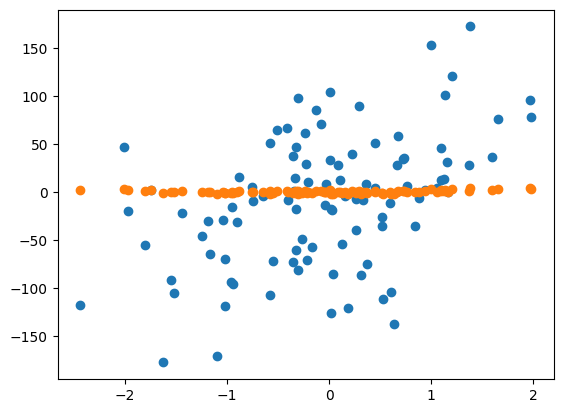

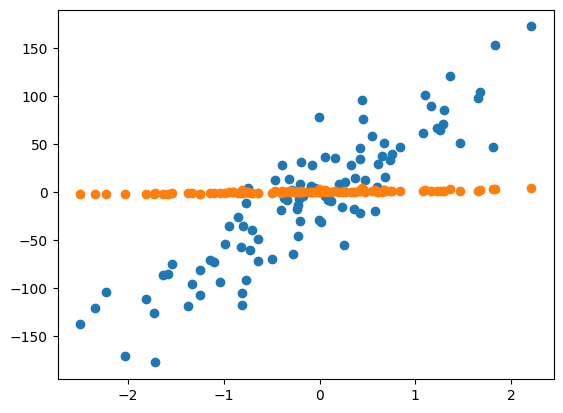

In [5]:
def model(X, theta):
    return X.dot(theta)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], model(X, theta))
plt.show()

plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], model(X, theta))
plt.show()

## 3. Cost Function

La fonction de coût utilisée ici s'appelle "Mean Squared Error" (MSE). Elle est définie par la formule suivante :

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(F - y \right)^2
$$

Où :
- $m$ est le nombre d'exemples dans l'ensemble de données.
- $ F $ est la prédiction du modèle pour l'exemple $ i$, donnée par les paramètres $ \theta $ et les caractéristiques $ X $.
- $ y $ est la matrice target représentant les valeurs réelles.
- Le terme $( F - y )^2$ représente l'erreur quadratique pour chaque exemple.
- Le facteur $ \frac{1}{2m} $ sert à normaliser la somme et à simplifier les calculs lors de l'optimisation (notamment la descente de gradient).

L'objectif est de minimiser cette fonction de coût en ajustant les paramètres $ \theta $ afin de réduire l'écart entre les prédictions et les valeurs réelles. 


In [31]:
def cost_function(X, theta, y):
    m = y.shape[0]
    return (1/2*m) * np.sum((model(X, theta) - y)**2)

## 4. Gradient Descent

La **Descente de Gradient** est un algorithme d'optimisation utilisé pour minimiser une fonction de coût, comme $ J(\theta) $. L'objectif est de trouver les paramètres $ \theta $ qui minimisent cette fonction de coût, en ajustant les paramètres du modèle pour rendre les prédictions aussi proches que possible des valeurs réelles.

Pour minimiser l'erreur de notre fonction $ J(\theta) $, nous devons calculer la dérivée de cette fonction par rapport à chaque paramètre $ \theta_i $. La dérivée nous indique la pente de la fonction de coût à chaque point pour chaque paramètre $ \theta_i $, ce qui nous aide à savoir dans quelle direction et de combien ajuster chaque paramètre pour réduire l'erreur du modèle.

La dérivée de la fonction de coût est donnée par :

$$
\frac{\partial J}{\partial \theta} = \frac{1}{m} X^T \cdot (F - y)
$$

Où :
- $ X^T $ est la transposée de la matrice $ X $, contenant les caractéristiques des exemples.
- $ F $ est le vecteur des prédictions du modèle.
- $ y $ est le vecteur des valeurs réelles.
- $ m $ est le nombre d'échantillons.

Cette dérivée nous permet de calculer l'ajustement nécessaire pour chaque paramètre $ \theta_i $.

Une fois la dérivée calculée, nous mettons à jour les paramètres du modèle à chaque itération en suivant la direction de la pente négative. C'est-à-dire que nous ajustons les paramètres pour réduire l'erreur, en appliquant la formule suivante :

$$
\theta = \theta - \alpha \frac{\partial J}{\partial \theta}
$$

Où :
- $ \theta $ est le vecteur des paramètres du modèle.
- $ \alpha $ est le **pas d'apprentissage** (learning rate), un hyperparamètre qui détermine la taille des étapes à chaque itération.
- $ \frac{\partial J}{\partial \theta} $ est la dérivée calculée précédemment.

L'algorithme effectue ces mises à jour de manière itérative, en ajustant les paramètres à chaque étape. Le processus se répète jusqu'à ce que les paramètres convergent vers des valeurs qui minimisent la fonction de coût $ J(\theta) $. En d'autres termes, l'algorithme continue de mettre à jour les paramètres jusqu'à ce que la dérivée devienne proche de zéro, ce qui signifie que la fonction de coût a atteint un minimum.

L'algorithme peut être exécuté pendant un certain nombre d'itérations ou jusqu'à ce que les mises à jour deviennent suffisamment petites (c'est-à-dire que la fonction de coût ne change plus beaucoup).


In [7]:
def gradient(X, theta, y):
    m = y.shape[0]
    return (1/m) * X.T.dot(model(X, theta) - y)

def gradient_descent(X, theta, y, iterations, learning_rate):
    cost_history = np.zeros((iterations, 1))
    for i in range(iterations):
        theta = theta - learning_rate * gradient(X, theta, y)
        cost_history[i] = cost_function(X, theta, y)
    return theta, cost_history

## 5. Phase D'Entraînement

In [35]:
final_theta, cost_history = gradient_descent(X, theta, y, 1000, 0.01)

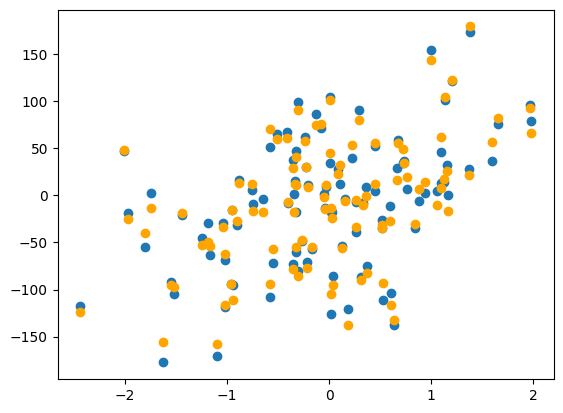

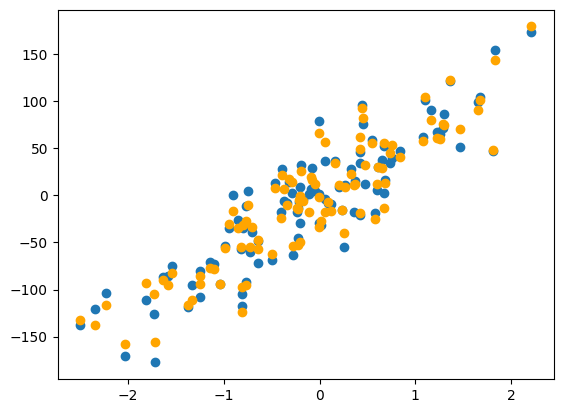

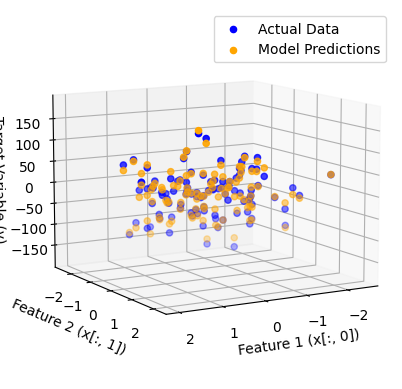

In [36]:
pred = model(X, final_theta)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], pred, c='orange')
plt.show()

plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], pred, c='orange')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Actual Data')

ax.scatter(x[:, 0], x[:, 1], pred, color='orange', label='Model Predictions')
ax.view_init(elev=10, azim=60)  # Change these values as needed

ax.set_xlabel('Feature 1 (x[:, 0])')
ax.set_ylabel('Feature 2 (x[:, 1])')
ax.set_zlabel('Target Variable (y)')

ax.legend()

plt.show()

## 6. Courbe D'Apprentissage

La **courbe d'apprentissage** est un outil visuel qui permet de suivre l'évolution de la fonction de coût $ J(\theta) $ pendant l'entraînement du modèle. Elle permet de visualiser comment l'erreur (ou la perte) du modèle évolue au fil des itérations de la descente de gradient. Elle est souvent utilisée pour diagnostiquer les problèmes d'apprentissage et pour ajuster les paramètres du modèle.

Le but principal de la courbe d'apprentissage est de montrer si le modèle apprend efficacement au fil du temps. Idéalement, la fonction de coût devrait diminuer progressivement au fur et à mesure que les paramètres sont ajustés. Si la courbe montre une diminution continue de l'erreur, cela signifie que le modèle est en train d'apprendre correctement.

La courbe d'apprentissage représente généralement deux informations principales :
- L'axe des ordonnées (y) : La valeur de la fonction de coût $ J(\theta) $, qui mesure l'erreur entre les prédictions du modèle et les valeurs réelles.
- L'axe des abscisses (x) : Le nombre d'itérations (ou d'epochs), c'est-à-dire le nombre de fois que le modèle a traversé l'ensemble des données d'entraînement.

Interprétation de la courbe d'apprentissage :
- Diminution régulière : Si la courbe montre une diminution régulière de la fonction de coût au fil des itérations, cela signifie que le modèle apprend correctement. À chaque itération, le modèle fait de meilleurs ajustements pour réduire l'erreur.
- Convergence rapide : Si la courbe diminue rapidement au début et se stabilise rapidement, cela peut indiquer que le modèle a trouvé rapidement un bon ensemble de paramètres. Cependant, si elle se stabilise trop tôt, cela pourrait signifier que le modèle n'est pas assez complexe pour apprendre correctement.
- Oscillation ou stagnation : Si la courbe oscille ou ne diminue pas de manière significative, cela pourrait indiquer que le pas d'apprentissage $ \alpha $ est trop grand ou que le modèle est mal spécifié. Dans ce cas, il pourrait être nécessaire d'ajuster le taux d'apprentissage ou d'explorer d'autres techniques d'optimisation.
- Augmentation de l'erreur : Si la courbe d'apprentissage montre que la fonction de coût augmente après un certain nombre d'itérations, cela pourrait indiquer un **surrapprentissage** (overfitting) ou un mauvais réglage des hyperparamètres.

En traçant la courbe d'apprentissage pendant l'entraînement, on peut observer si l'algorithme converge bien ou s'il est nécessaire d'ajuster certains paramètres comme le pas d'apprentissage \$ \alpha $, la régularisation, ou le nombre d'itérations. La courbe peut aussi être utilisée pour détecter des problèmes comme le **sous-apprentissage** (underfitting) ou le **surrapprentissage** (overfitting), en comparant les courbes d'entraînement et de validation.

Une bonne courbe d'apprentissage devrait montrer une diminution continue de la fonction de coût, et idéalement, il ne devrait pas y avoir de grandes fluctuations.


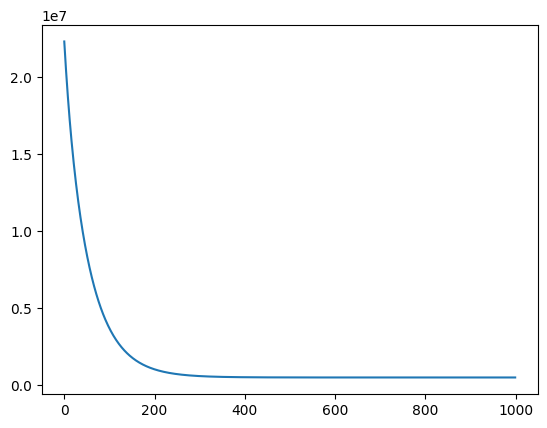

In [37]:
plt.plot(range(1000), cost_history)
plt.show()

## 7. Evaluation Finale

Dans le cadre de l'évaluation de la performance du modèle, l'une des métriques les plus couramment utilisées est le **coefficient de détermination** $ R^2 $. Ce coefficient mesure la proportion de la variance totale des données qui est expliquée par le modèle. Plus précisément, il compare la somme des carrés des erreurs du modèle à la somme des carrés totaux par rapport à la moyenne des valeurs réelles.

Le coefficient de détermination \( R^2 \) est défini par la formule suivante :

$$
R^2 = 1 - \frac{\sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{m} (y^{(i)} - \bar{y})^2}
$$

Où :
- $ y^{(i)} $ représente la valeur réelle de l'exemple $ i $,
- $ \hat{y}^{(i)} $ est la prédiction du modèle pour cet exemple,
- $ \bar{y} $ est la moyenne des valeurs réelles des exemples.

Interprétation du coefficient $ R^2 $ :
- **$ R^2 = 1 $** : Cela signifie que le modèle explique parfaitement la variance des données, et toutes les prédictions sont égales aux valeurs réelles.
- **$ R^2 = 0 $** : Le modèle ne fait pas mieux qu'une prédiction qui serait simplement la moyenne des valeurs réelles. Il n'explique aucune variance.
- **$ R^2 < 0 $** : Cela indique que le modèle est moins performant qu'un modèle qui prédit constamment la moyenne des valeurs réelles. C'est un indicateur que le modèle ne correspond pas du tout aux données.

Fonction de calcul du coefficient $ R^2 $ :

La fonction `coef_determination` permet de calculer ce coefficient à partir des valeurs réelles et des prédictions faites par le modèle. Elle suit les étapes suivantes :
1. **Calcul de la somme des carrés des erreurs** $ u $, qui est la différence entre les valeurs réelles et les prédictions.
2. **Calcul de la somme des carrés totaux** $ v $, qui est la variance des valeurs réelles par rapport à leur moyenne.
3. **Calcul du $ R^2 $** à l'aide de la formule $ R^2 = 1 - \frac{u}{v} $.

In [40]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

print(coef_determination(y, pred))

0.977859005585573
